-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

# Time Series Forecasting

Working with time series data is an often **under-represented** skill in data science.  In this notebook, you explore three main approaches to time series: **Prophet, ARIMA, and exponential smoothing**.

## ![Spark Logo Tiny](https://files.training.databricks.com/images/105/logo_spark_tiny.png) In this lesson you will:<br>
- **Introduce the main concepts in Time Series**
- **Forecast COVID data using Prophet**
- **Forecast using ARIMA**
- **Forecast using Exponential Smoothing**

In this notebook we will be using the <a href="https://www.kaggle.com/kimjihoo/coronavirusdataset" target="_blank">Coronavirus dataset</a> containing data about Coronavirus patients in South Korea.

In [0]:
%pip install --upgrade pystan==2.19.1.1 fbprophet

Python interpreter will be restarted.
Collecting pystan==2.19.1.1
 Downloading pystan-2.19.1.1-cp38-cp38-manylinux1_x86_64.whl (62.6 MB)
Collecting fbprophet
 Downloading fbprophet-0.7.1.tar.gz (64 kB)
Requirement already satisfied: numpy>=1.7 in /databricks/python3/lib/python3.8/site-packages (from pystan==2.19.1.1) (1.20.1)
Requirement already satisfied: Cython!=0.25.1,>=0.22 in /databricks/python3/lib/python3.8/site-packages (from pystan==2.19.1.1) (0.29.23)
Collecting cmdstanpy==0.9.5
 Downloading cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
Requirement already satisfied: pandas>=1.0.4 in /databricks/python3/lib/python3.8/site-packages (from fbprophet) (1.2.4)
Requirement already satisfied: matplotlib>=2.0.0 in /databricks/python3/lib/python3.8/site-packages (from fbprophet) (3.4.2)
Collecting LunarCalendar>=0.0.9
 Downloading LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
Collecting convertdate>=2.1.2
 Downloading convertdate-2.4.0-py3-none-any.whl (47 kB)
Collecting holidays>=0.10.2
 Downloading holidays-0.15-py3-none-any.whl (181 kB)
Collecting setuptools-git>=1.2
 Downloading setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
Requirement already satisfied: python-dateutil>=2.8.0 in /databricks/python3/lib/python3.8/site-packages (from fbprophet) (2.8.1)
Collecting tqdm>=4.36.1
 Downloading tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
Collecting pymeeus<=1,>=0.3.13
 Downloading PyMeeus-0.5.11.tar.gz (5.4 MB)
Collecting korean-lunar-calendar
 Downloading korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
Collecting hijri-converter
 Downloading hijri_converter-2.2.4-py3-none-any.whl (14 kB)
Collecting ephem>=3.7.5.3
 Downloading ephem-4.1.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.8/site-packages (from LunarCalendar>=0.0.9->fbprophet) (2020.5)
Requirement already satisfied: pillow>=6.2.0 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.0.0->fbprophet) (8.2.0)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.0.0->fbprophet) (0.10.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.0.0->fbprophet) (1.3.1)
Requirement already satisfied: pyparsing>=2.2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.0.0->fbprophet) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib>=2.0.0->fbprophet) (1.15.0)
Building wheels for collected packages: fbprophet, pymeeus
 Building wheel for fbprophet (setup.py): started
 Building wheel for fbprophet (setup.py): finished with status 'error'
 ERROR: Command errored out with exit status 1:
 command: /local_disk0/.ephemeral_nfs/envs/pythonEnv-9ee1ac29-0b93-4510-a52f-eb3b18374d8f/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_5g9u4yi/fbprophet_0d7e676e058a49b3a7a51c470e4b98a1/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_5g9u4yi/fbprophet_0d7e676e058a49b3a7a51c470e4b98a1/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-j7pz4t0j
 cwd: /tmp/pip-install-_5g9u4yi/fbprophet_0d7e676e058a49b3a7a51c470e4b98a1/
 Complete output (44 lines):
 running bdist_wheel
 running build
 running build_py
 creating build
 creating build/lib
 creating build/lib/fbprophet
 creating build/lib/fbprophet/stan_model
 Traceback (most recent call last):
 File "<string>", line 1, in <module>
 File "/tmp/pip-install-_5g9u4yi/fbprophet_0d7e676e058a49b3a7a51c470e4b98a1/setup.py", line 122, in <module>
 setup(
 File "/usr/local/lib/python3.8/dist-packages/setuptools/__init__.py", line 153, in setup
 return distutils.core.setup(**attrs)
 File "/usr/lib/python3.8/distutils/core.py", line 148, in setup

In [0]:
%run ../Includes/Classroom-Setup

Defining courseware-specific utility methods...

The source for this dataset is
wasbs://courseware@dbacademy.blob.core.windows.net/scalable-machine-learning-with-apache-spark/v01/

Your dataset directory is
dbfs:/user/manujkumar.joshi@celebaltech.com/dbacademy/machine_learning/datasets

Skipping install of existing dataset.

### <a href="https://en.wikipedia.org/wiki/Time_series", target="_blank">Time Series</a>

- A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. Examples of time series include:<br><br>

  - **Heights of ocean tides**
  - **Counts of sunspots**
  - **Daily closing value of the Dow Jones Industrial Average**

In this notebook, we will be focusing on time series forecasting, or, the use of a model to predict future values based on previously observed values.

In [0]:
file_path = f"{datasets_dir}/COVID/coronavirusdataset/Time.csv"

spark_df = (spark
            .read
            .option("inferSchema", True)
            .option("header", True)
            .csv(file_path)
           )
  
display(spark_df)

date,time,test,negative,confirmed,released,deceased
2020-01-20T00:00:00.000+0000,16,1,0,1,0,0
2020-01-21T00:00:00.000+0000,16,1,0,1,0,0
2020-01-22T00:00:00.000+0000,16,4,3,1,0,0
2020-01-23T00:00:00.000+0000,16,22,21,1,0,0
2020-01-24T00:00:00.000+0000,16,27,25,2,0,0
2020-01-25T00:00:00.000+0000,16,27,25,2,0,0
2020-01-26T00:00:00.000+0000,16,51,47,3,0,0
2020-01-27T00:00:00.000+0000,16,61,56,4,0,0
2020-01-28T00:00:00.000+0000,16,116,97,4,0,0
2020-01-29T00:00:00.000+0000,16,187,155,4,0,0


#### Convert the Spark DataFrame to a Pandas DataFrame.

In [0]:
df = spark_df.toPandas()
df.head()

Out[9]:

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


Looking at the data, the time column (what time of day the data was reported) is not especially relevant to our forecast, so we can go ahead and drop it.

In [0]:
df = df.drop(columns="time")
df.head()

Out[10]:

,date,test,negative,confirmed,released,deceased
0,2020-01-20,1,0,1,0,0
1,2020-01-21,1,0,1,0,0
2,2020-01-22,4,3,1,0,0
3,2020-01-23,22,21,1,0,0
4,2020-01-24,27,25,2,0,0


## Prophet
#### <a href="https://facebook.github.io/prophet/" target="_blank">Facebook's Prophet</a> is widely considered the easiest way to forecast because it generally does all the heavy lifting for the user. Let's take a look at how Prophet works with our dataset.

In [0]:
import pandas as pd
from fbprophet import Prophet
import logging

# Suppresses `java_gateway` messages from Prophet as it runs.
logging.getLogger("py4j").setLevel(logging.ERROR)

Prophet expects certain column names for its input DataFrame. The date column must be renamed ds, and the column to be forecast should be renamed y. Let's go ahead and forecast the number of confirmed patients in South Korea.

In [0]:
prophet_df = pd.DataFrame()
prophet_df["ds"] = pd.to_datetime(df["date"])
prophet_df["y"] = df["confirmed"]
prophet_df.head()

Out[12]:

,ds,y
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2


Next, let's specify how many days we want to forecast for. We can do this using the **`Prophet.make_future_dataframe`** method. With the size of our data, let's take a look at the numbers a month from now. 

We can see dates up to one month in the future.

In [0]:
prophet_obj = Prophet()
prophet_obj.fit(prophet_df) ## training
prophet_future = prophet_obj.make_future_dataframe(periods=30)
prophet_future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Out[13]:

,ds
188,2020-07-26
189,2020-07-27
190,2020-07-28
191,2020-07-29
192,2020-07-30


Finally, we can run the **`predict`** method to forecast our data points. The **`yhat`** column contains the forecasted values. You can also look at the entire DataFrame to see what other values Prophet generates.

In [0]:
prophet_forecast = prophet_obj.predict(prophet_future)
prophet_forecast[['ds', 'yhat']].tail()

Out[18]:

,ds,yhat
188,2020-07-26,13203.318192
189,2020-07-27,13285.334423
190,2020-07-28,13288.929391
191,2020-07-29,13290.954439
192,2020-07-30,13309.074685


#### Let's take a look at a graph representation of our forecast using **`plot`**

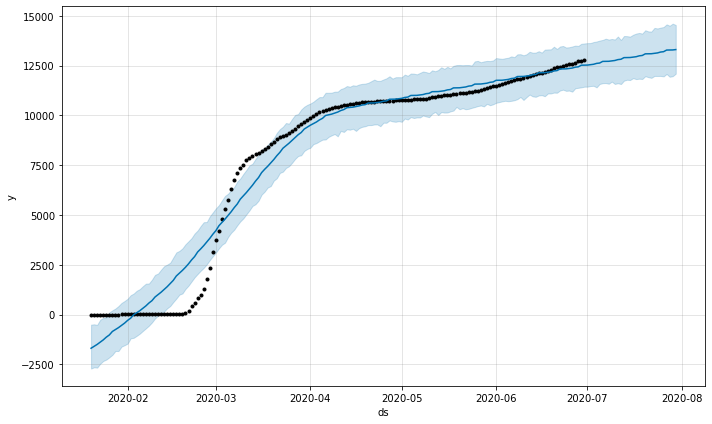

In [0]:
prophet_plot = prophet_obj.plot(prophet_forecast)

We can also use **`plot_components`** to get a more detailed look at our forecast.

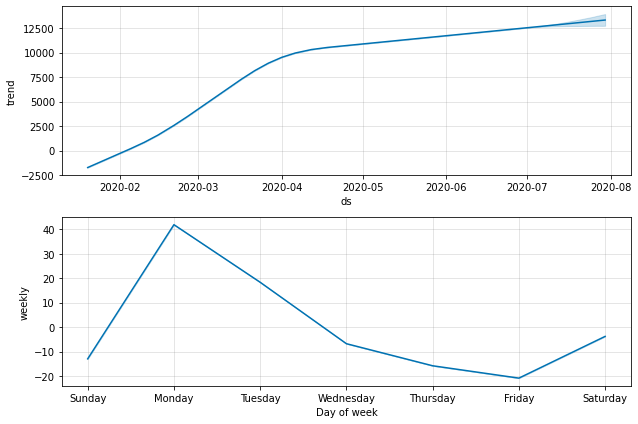

In [0]:
prophet_plot2 = prophet_obj.plot_components(prophet_forecast)

We can also use Prophet to identify <a href="https://facebook.github.io/prophet/docs/trend_changepoints.html" target="_blank">changepoints</a>, points where the dataset had an abrupt change. This is especially useful for our dataset because it could identify time periods where Coronavirus cases spiked.

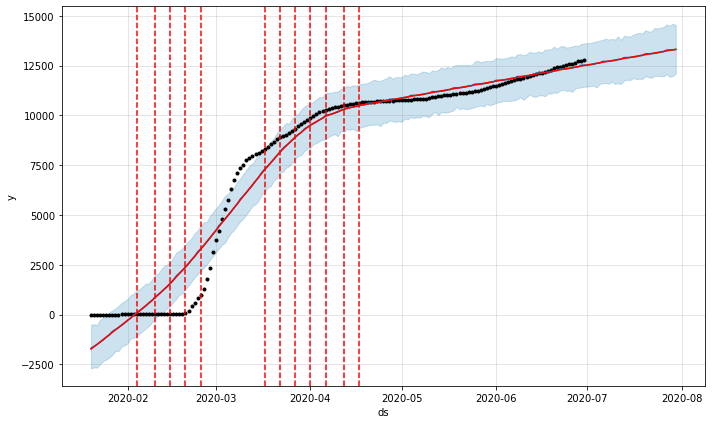

In [0]:
from fbprophet.plot import add_changepoints_to_plot

prophet_plot = prophet_obj.plot(prophet_forecast)
changepts = add_changepoints_to_plot(prophet_plot.gca(), prophet_obj, prophet_forecast)

In [0]:
print(prophet_obj.changepoints)

5 2020-01-25
10 2020-01-30
15 2020-02-04
21 2020-02-10
26 2020-02-15
31 2020-02-20
36 2020-02-25
41 2020-03-01
46 2020-03-06
52 2020-03-12
57 2020-03-17
62 2020-03-22
67 2020-03-27
72 2020-04-01
77 2020-04-06
83 2020-04-12
88 2020-04-17
93 2020-04-22
98 2020-04-27
103 2020-05-02
108 2020-05-07
114 2020-05-13
119 2020-05-18
124 2020-05-23
129 2020-05-28
Name: ds, dtype: datetime64[ns]

#### Next, let's find out if there's any correlation between holidays in South Korea and increases in confirmed cases. We can use the built-in **`add_country_holidays`** <a href="https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#built-in-country-holidays" target="_blank">method</a> to find out about any trends.

You can find a complete list of country codes <a href="https://github.com/dr-prodigy/python-holidays/blob/master/holidays/countries/" target="_blank">here</a>.

In [0]:
holidays = pd.DataFrame({"ds": [], "holiday": []})
prophet_holiday = Prophet(holidays=holidays)

prophet_holiday.add_country_holidays(country_name='KR')
prophet_holiday.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Out[23]: <fbprophet.forecaster.Prophet at 0x7f39122d2370>

#### You can check what holidays are included by running the following cell.

In [0]:
prophet_holiday.train_holiday_names

Out[24]: 0 New Year's Day
1 The day preceding of Lunar New Year's Day
2 Lunar New Year's Day
3 The second day of Lunar New Year's Day
4 Alternative holiday of Lunar New Year's Day
5 Independence Movement Day
6 Birthday of the Buddha
7 Children's Day
8 Labour Day
9 Memorial Day
10 Liberation Day
11 The day preceding of Chuseok
12 Chuseok
13 The second day of Chuseok
14 National Foundation Day
15 Hangeul Day
16 Christmas Day
17 Alternative public holiday
dtype: object

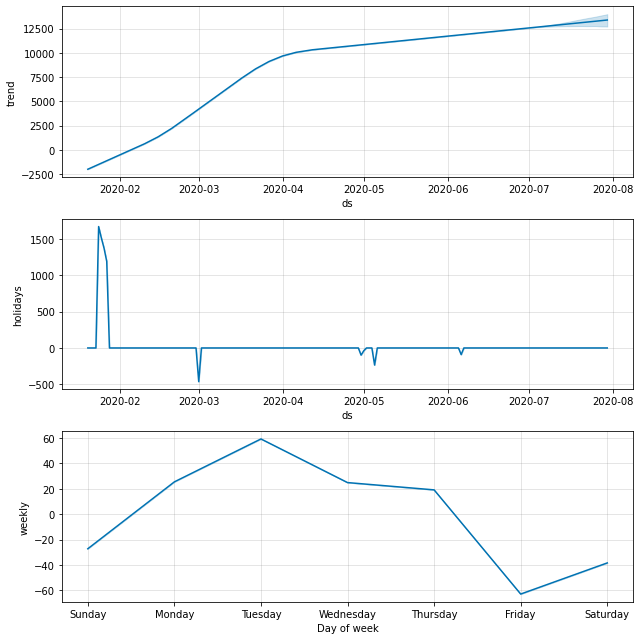

In [0]:
prophet_future = prophet_holiday.make_future_dataframe(periods=30)
prophet_forecast = prophet_holiday.predict(prophet_future)
prophet_plot_holiday = prophet_holiday.plot_components(prophet_forecast)

### ARIMA

#### ARIMA stands for Auto-Regressive (AR) Integrated (I) Moving Average (MA). An ARIMA model is a form of regression analysis that gauges the strength of one dependent variable relative to other changing variables.

Much like Prophet, ARIMA  predicts future values based on the past values of your dataset. Unlike Prophet, ARIMA has a lot more set-up work but can be applied to a wide variety of time series.

To create our ARIMA model, we need to find the following parameters:<br><br>

- **`p`**: The number of lag observations included in the model, also called the lag order.
- **`d`**: The number of times that the raw observations are differenced, also called the degree of differencing.
- **`q`**: The size of the moving average window, also called the order of moving average.

Start with making our new ARIMA DataFrame. Since we already forecast the confirmed cases using Prophet, let's take a look at predictions for released patients.

In [0]:
arima_df = pd.DataFrame()
arima_df["date"] = pd.to_datetime(df["date"])
arima_df["released"] = df["released"]
arima_df.head()

Out[26]:

,date,released
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0


The first step of creating an ARIMA model is to find the d-parameter by making sure your dataset is stationary. This is easy to check using an <a href="https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test" target="_blank">Augmented Dickey Fuller Test</a> from the **`statsmodels`** library. 

Since the P-value is larger than the ADF statistic, we will have to difference the dataset. Differencing helps stabilize the mean of the dataset, therefore removing the influence of past trends and seasonality on your data.

In [0]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.released.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.652055699726461
p-value: 0.8587805540699576

To difference the dataset, call **`diff`** on the value column. We are looking for a near-stationary series which roams around a defined mean and an ACF plot that reaches zero fairly quickly. After looking at our graphs, we can determine that our d-parameter should either be 1 or 2.

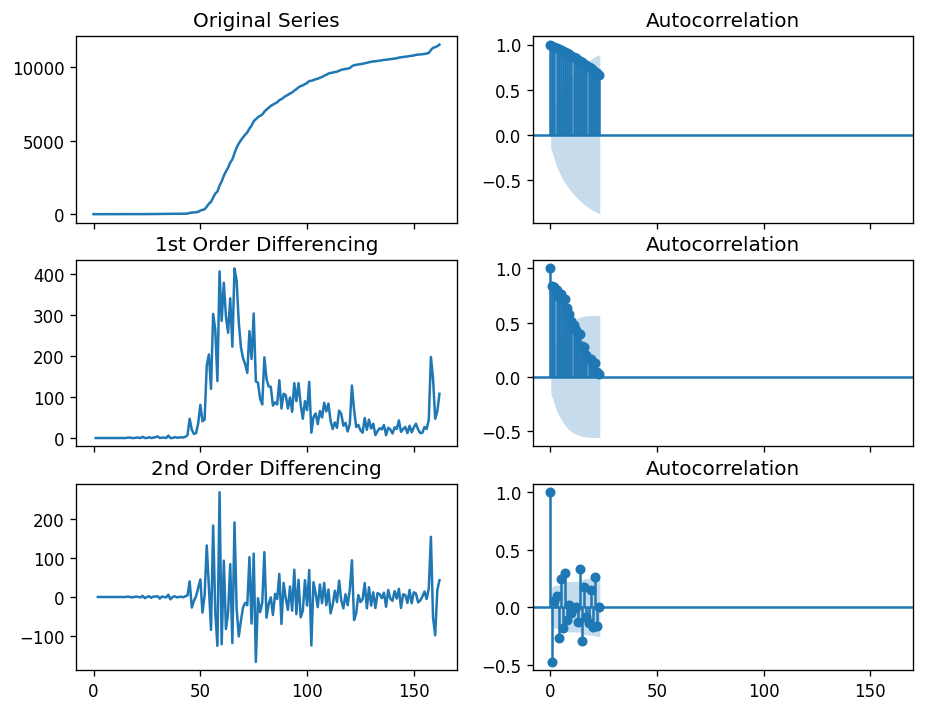

In [0]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({"figure.figsize":(9,7), "figure.dpi":120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(arima_df.released); axes[0, 0].set_title('Original Series')
plot_acf(arima_df.released, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(arima_df.released.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(arima_df.released.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(arima_df.released.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(arima_df.released.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In the next section we'll find the required number of AR terms using the Partial Autocorrection Plot. This is the p-parameter.

Partial Autocorrection is the correlation between a series and its lag. From the graphs, our p-parameter should be 1.

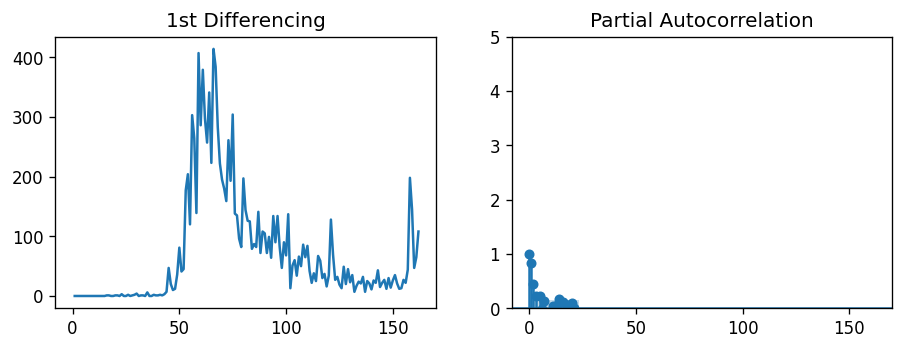

In [0]:
plt.rcParams.update({"figure.figsize":(9,3), "figure.dpi":120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(arima_df.released.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(arima_df.released.diff().dropna(), ax=axes[1])

plt.show()

Finally, we'll find the q-parameter by looking at the ACF plot to find the number of Moving Average terms. A Moving Average incorporates the dependency between an observation and a residual error applied to lagged observations. From the graphs, our q-parameter should be 1.

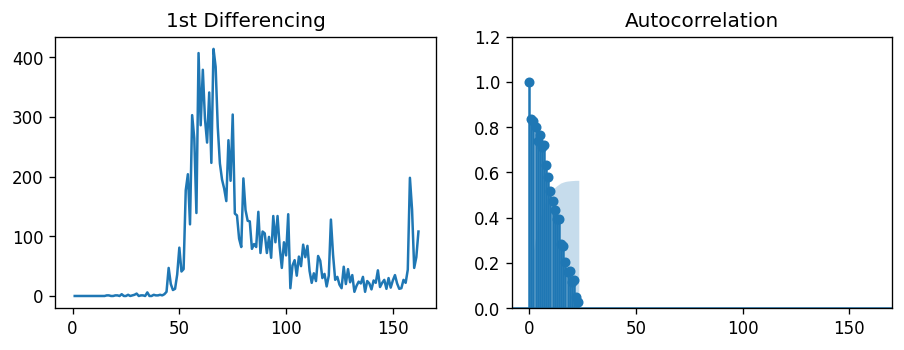

In [0]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(arima_df.released.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(arima_df.released.diff().dropna(), ax=axes[1])

plt.show()

Once we have found our p, d, and q parameter values, we can fit our ARIMA model by passing the parameters in. The following cell shows a summary of the model including dataset information and model coefficients.

In [0]:
from statsmodels.tsa.arima_model import ARIMA

# p, d, q
# 1, 2, 1 ARIMA Model
model = ARIMA(arima_df.released, order=(1,2,1))
arima_fit = model.fit(disp=0)
print(arima_fit.summary())

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
 FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
 FutureWarning)

 warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
 FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
 FutureWarning)

 warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 ARIMA Model Results 
==============================================================================
Dep. Variable: D2.released No. Observations: 161
Model: ARIMA(1, 2, 1) Log Likelihood -843.395
Method: css-mle S.D. of innovations 45.530
Date: Mon, 29 Aug 2022 AIC 1694.790
Time: 11:38:30 BIC 1707.115
Sample: 2 HQIC 1699.794
 
=====================================================================================
 coef std err z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------
const 0.5705 1.729 0.330 0.741 -2.819 3.960
ar.L1.D2.released -0.1441 0.135 -1.071 0.284 -0.408 0.120
ma.L1.D2.released -0.4519 0.119 -3.783 0.000 -0.686 -0.218
 Roots 
=============================================================================
 Real Imaginary Modulus Frequency
-----------------------------------------------------------------------------
AR.1 -6.9416 +0.0000j 6.9416 0.5000
MA.1 2.2126 +0.0000j 2.2126 0.0000
-----------------------------------------------------------------------------

Finally, let's split our data into train and test data to test the accuracy of our model. Note that since we have to split the data sequentially for time series, functions like sklearn's **`train_test_split`** cannot be used here.

In [0]:
split_ind = int(len(arima_df)*.7)
train_df = arima_df[ :split_ind]
test_df = arima_df[split_ind: ]
#train_df.tail()
#test_df.head()

To forecast we use Out of Sample Cross Validation. We can see from the graph that our forecast is slightly more linear than the actual values but overall the values are pretty close to expected.

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
 FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
 FutureWarning)

 warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
 FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
 FutureWarning)

 warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

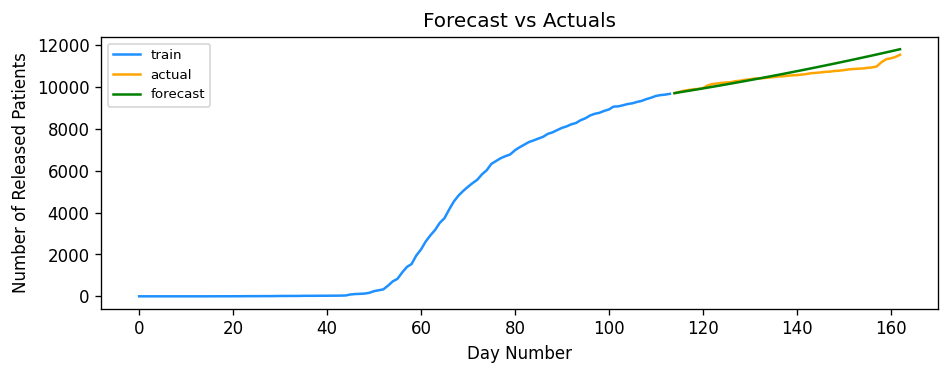

In [0]:
train_model = ARIMA(train_df.released, order=(1,2,1))  
train_fit = train_model.fit()  

fc, se, conf = train_fit.forecast(int(len(arima_df)-split_ind))

fc_series = pd.Series(fc, index=test_df.index)

plt.plot(train_df.released, label='train', color="dodgerblue")
plt.plot(test_df.released, label='actual', color="orange")
plt.plot(fc_series, label='forecast', color="green")
plt.title('Forecast vs Actuals')
plt.ylabel("Number of Released Patients")
plt.xlabel("Day Number")
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Exponential Smoothing

<a href="(https://en.wikipedia.org/wiki/Exponential_smoothing" target="_blank">Exponential smoothing</a> is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality. Exponential smoothing is often used for analysis of time-series data.

There are three types of Exponential Smoothing:<br><br>
- Single Exponential Smoothing (SES)
  - Used for datasets without trends or seasonality.
- Double Exponential Smoothing (also known as Holt's Linear Smoothing)
  - Used for datasets with trends but without seasonality.
- Triple Exponential Smoothing (also known as Holt-Winters Exponential Smoothing)
  - Used for datasets with both trends and seasonality.

In our case, the Coronavirus dataset has a clear trend, but seasonality is not especially important, therefore we will be using double exponential smoothing.

Since we have already forecast the other two columns, let's take a look at a forecast for the number of coronavirus related deaths.

In [0]:
exp_df = pd.DataFrame()
exp_df["date"] = pd.to_datetime(df["date"])
exp_df["deceased"] = df["deceased"]
exp_df.head()

Out[35]:

,date,deceased
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0


Holt's Linear Smoothing only works on data points that are greater than 0, therefore we have to drop the corresponding rows. Additionally, we need to set the index of our DataFrame to the date column.

In [0]:
exp_df = exp_df[exp_df["deceased"] != 0]
exp_df = exp_df.set_index("date")
exp_df.head()

Out[36]:

,deceased
date,
2020-02-20,1
2020-02-21,2
2020-02-22,2
2020-02-23,6
2020-02-24,8


Luckily, statsmodel does most of the work for us. However, we still have to tweak the parameters to get an accurate forecast. The available parameters here are α or **`smoothing_level`** and β or **`smoothing_slope`**. α defines the smoothing factor of the level and β defines the smoothing factor of the trend.

In the cell below, we are trying three different kinds of predictions. The first, Holt's Linear Trend, forecasts with a linear trend. The second, Exponential Trend, forecasts with an exponential trend. The third, Additive Damped Trend, damps the forecast trend linearly.

In [0]:
from statsmodels.tsa.holtwinters import Holt

exp_fit1 = Holt(exp_df.deceased).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
exp_forecast1 = exp_fit1.forecast(30).rename("Holt's linear trend")

exp_fit2 = Holt(exp_df.deceased, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
exp_forecast2 = exp_fit2.forecast(30).rename("Exponential trend")

exp_fit3 = Holt(exp_df.deceased, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
exp_forecast3 = exp_fit3.forecast(30).rename("Additive damped trend")

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
 warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
 warnings.warn(
<command-2766372978751605>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
 exp_fit1 = Holt(exp_df.deceased).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
 warnings.warn('No frequency information was'
<command-2766372978751605>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
 exp_fit2 = Holt(exp_df.deceased, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
<command-2766372978751605>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
 exp_fit3 = Holt(exp_df.deceased, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
 warnings.warn('No frequency information was'
<command-2766372978751605>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
 exp_fit3 = Holt(exp_df.deceased, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)

After plotting the three models, we can see that the standard Holt's Linear, and the Exponential trend lines give very similar forecasts while the Additive Damped trend gives a slightly lower number of deceased patients.

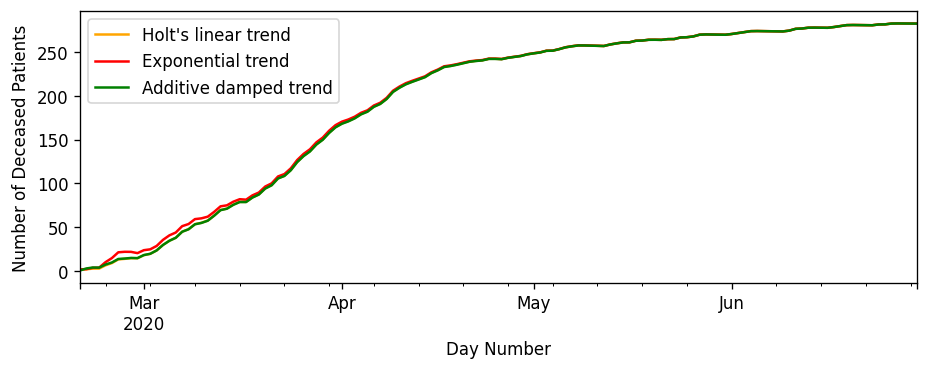

In [0]:
exp_fit1.fittedvalues.plot(color="orange", label="Holt's linear trend")
exp_fit2.fittedvalues.plot(color="red", label="Exponential trend")
exp_fit3.fittedvalues.plot(color="green", label="Additive damped trend")

plt.legend()
plt.ylabel("Number of Deceased Patients")
plt.xlabel("Day Number")
plt.show()

We can zoom in on the forecast part of our graph to see the graph in more detail.

We can see that the exponential trendline starts in-line with the linear trendline but slowly starts resembling an exponential trend towards the end of the graph. The damped trendline starts and ends below the other trendlines.

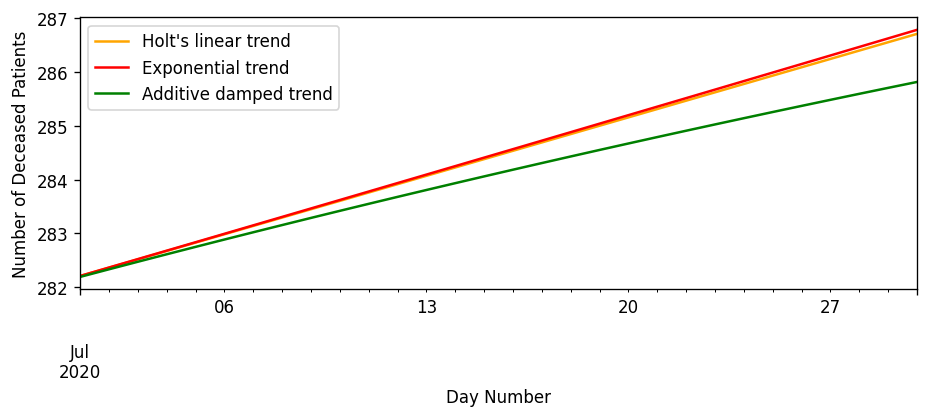

In [0]:
exp_forecast1.plot(legend=True, color="orange")
exp_forecast2.plot(legend=True, color="red")
exp_forecast3.plot(legend=True, color="green")

plt.ylabel("Number of Deceased Patients")
plt.xlabel("Day Number")
plt.show()

-sandbox
&copy; 2022 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="https://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="https://help.databricks.com/">Support</a>